In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.gridspec import GridSpec

In [6]:
# define the path to the data folder
path = Path().resolve()
path_data = path.parent

In [7]:
def combine_csv_files(file_list, output_file):
    # Read NHANES Description IDs
    df_description = pd.read_csv(str(path_data) + '/data/step_02_07_Fields.csv')

    data_frames = []
    
    # read each file in the list
    for file in file_list:
        file_path = str(path_data) + file
        print(file_path)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            if 'discovery' in file:
                df['data_source'] = 'discovery'
            elif 'replicate' in file:
                df['data_source'] = 'replicate'
            data_frames.append(df)
        else:
            print(f"File {file_path} not found.")
    
    # concat all dataframes into a single dataframe
    combined_df = pd.concat(data_frames, ignore_index=True)

    # print(combined_df)

    # Adiciona as descrições para Term1 e Term2
    combined_df = combined_df.merge(df_description, left_on='Term1', right_on='field_name', how='left')
    combined_df = combined_df.rename(columns={'field_description': 'Term1_description'})
    combined_df = combined_df.drop(columns=['field_name'])

    combined_df = combined_df.merge(df_description, left_on='Term2', right_on='field_name', how='left')
    combined_df = combined_df.rename(columns={'field_description': 'Term2_description'})
    combined_df = combined_df.drop(columns=['field_name'])

    # Reordena as colunas
    column_order = [
        'Unnamed: 0',
        'data_source',
        'Outcome',
        'Term1',
        'Term1_description',
        'Term2',
        'Term2_description',
        'Converged',
        'N',
        'pvalue',
        'pvalue_bonferroni',
        'pvalue_fdr',            
        "Red_Var1_beta",
        "Red_Var1_SE",
        "Red_Var1_Pval",
        "Red_Var2_beta",
        "Red_Var2_SE",
        "Red_Var2_Pval",
        "Full_Var1_Var2_beta",
        "Full_Var1_Var2_SE",
        "Full_Var1_Var2_Pval",
        "Full_Var1_beta",
        "Full_Var1_SE",
        "Full_Var1_Pval",
        "Full_Var2_beta",
        "Full_Var2_SE",
        "Full_Var2_Pval",
        "Log",
    ]
    
    combined_df = combined_df[column_order]

    return combined_df

In [4]:
# Lista de arquivos CSV para combinar
file_list = [
    '/data/step_06_00/Result_LBDHDD_replicate.csv',
    '/data/step_06_00/Result_LBDHDL_replicate.csv',
    '/data/step_06_00/Result_LBDLDL_N_replicate.csv',
    '/data/step_06_00/Result_LBXHDD_replicate.csv',
    '/data/step_06_00/Result_LBXSTR_replicate.csv',
    '/data/step_06_00/Result_LBXTC_N_replicate.csv',
    '/data/step_06_00/Result_LBDHDD_discovery.csv',
    '/data/step_06_00/Result_LBDHDL_discovery.csv',
    '/data/step_06_00/Result_LBDLDL_N_discovery.csv',
    '/data/step_06_00/Result_LBXHDD_discovery.csv',
    '/data/step_06_00/Result_LBXSTR_discovery.csv',
    '/data/step_06_00/Result_LBXTC_N_discovery.csv',
]

In [5]:
# Nome do arquivo CSV de saída
output_file = '/data/step_07_00_results'

# Chama a função para combinar os arquivos CSV
combined_df = combine_csv_files(file_list, output_file)
    
# Salva o DataFrame combinado em um único arquivo CSV
combined_df.to_csv(str(path_data) + output_file + '.csv', index=False)
combined_df.to_excel(str(path_data) + output_file + '.xlsx', index=False)
print(f"Combined CSV saved to {output_file}")

/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDHDD_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDHDL_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDLDL_N_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBXHDD_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBXSTR_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBXTC_N_replicate.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDHDD_discovery.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDHDL_discovery.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBDLDL_N_discovery.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBXHDD_discovery.csv
/project/ritchie07/personal/nikki/pbs_igem2/data/step_06_00/Result_LBXSTR_discovery.csv
/project/ritchie07/personal

STEP 07_02: Analysis Sig Replicate Results

In [8]:
# Read the results from replications
df_results = pd.read_csv(str(path_data / 'data/step_07_00_results.csv'))
print(f"{len(df_results)}: Results from replications")

# Keep only significant results
df_results_bonf_05 = df_results[df_results['pvalue_bonferroni'] < 0.05]
df_results_fdr_10 = df_results[df_results['pvalue_fdr'] < 0.1]

# df_results = df_results[df_results['data_source'] == 'replicate']
print(f"{len(df_results_bonf_05)} : Significant results with Bonferroni correction < 0.05")
print(f"{len(df_results_fdr_10)} : Significant results with FDR correction < 0.10")


32803: Results from replications
97 : Significant results with Bonferroni correction < 0.05
324 : Significant results with FDR correction < 0.10


In [4]:
# Bonfer drop
valid_combinations = df_results_bonf_05.groupby(['Outcome', 'Term1', 'Term2'])['data_source'].nunique() == 2
valid_combinations = valid_combinations[valid_combinations].index
filtered_df_bonf = df_results_bonf_05[df_results_bonf_05.set_index(['Outcome', 'Term1', 'Term2']).index.isin(valid_combinations)].reset_index(drop=True)
filtered_df_bonf.to_csv(str(path_data / 'data/step_07_01_results_bonf_05.csv'), index=False)

In [5]:
len(filtered_df_bonf)/2

21.0

In [6]:
# FDR drop
valid_combinations = df_results_fdr_10.groupby(['Outcome', 'Term1', 'Term2'])['data_source'].nunique() == 2
valid_combinations = valid_combinations[valid_combinations].index
filtered_df_fdr = df_results_fdr_10[df_results_fdr_10.set_index(['Outcome', 'Term1', 'Term2']).index.isin(valid_combinations)].reset_index(drop=True)
filtered_df_fdr.to_csv(str(path_data / 'data/step_07_01_results_fdr_10.csv'), index=False)

In [7]:
len(filtered_df_fdr)/2

61.0

In [8]:
filtered_df_fdr.to_csv(str(path_data / 'data/step_07_01_results_filtered.csv'), index=False)

In [8]:
# Define the groups
list_covariates = ['RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'BMXBMI']
list_outcomes = ['LBDLDL_N', 'LBXTC_N', 'LBXSTR', 'LBDHDL', 'LBXHDD', 'LBDHDD']

### create plot

In [11]:
# Loop to process each Outcome
results = []

outcome = 'LBDHDD' # DEBUG ONLY

# Read QC Dataset
file_name = str(path_data) + "/data/step_05_05/QC_NHANES_" + outcome + ".pkl"
df_nhanes = pd.read_pickle(file_name)

df_results_outcome = filtered_df_bonf[filtered_df_bonf['Outcome'] == outcome]

# Filter only Terms on interest
term1_interest = ['LBXDP3', 'LBX2DF', 'LBXST1']
term2_interest = ['LBXAR1', 'LBXVBZ', 'LBXAR1']
df_results_outcome = df_results_outcome[
    df_results_outcome['Term1'].isin(term1_interest) &
    df_results_outcome['Term2'].isin(term2_interest)
]

# ['LBXDP3', 'LBXAR1'], ['LBX2DF', 'LBXVBZ'], ['LBXST1', 'LBXAR1']

In [12]:
df_results_outcome.columns

Index(['Unnamed: 0', 'data_source', 'Outcome', 'Term1', 'Term1_description',
       'Term2', 'Term2_description', 'Converged', 'N', 'pvalue',
       'pvalue_bonferroni', 'pvalue_fdr', 'Red_Var1_beta', 'Red_Var1_SE',
       'Red_Var1_Pval', 'Red_Var2_beta', 'Red_Var2_SE', 'Red_Var2_Pval',
       'Full_Var1_Var2_beta', 'Full_Var1_Var2_SE', 'Full_Var1_Var2_Pval',
       'Full_Var1_beta', 'Full_Var1_SE', 'Full_Var1_Pval', 'Full_Var2_beta',
       'Full_Var2_SE', 'Full_Var2_Pval', 'Log'],
      dtype='object')

Processing: LBDHDD - LBX2DF - LBXVBZ || replicate


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


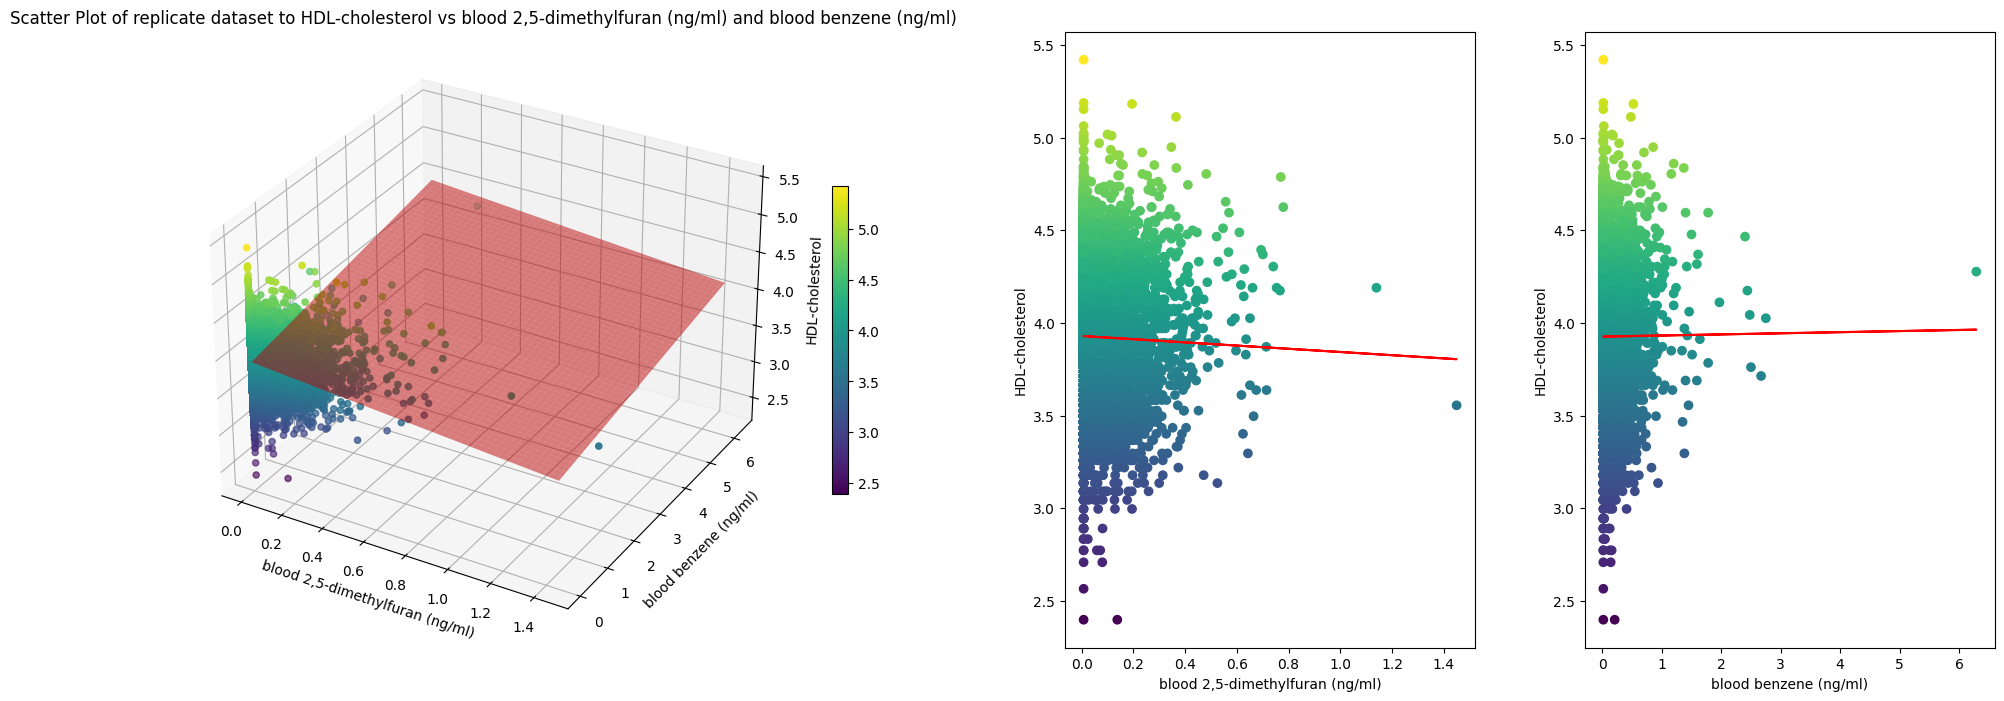

Processing: LBDHDD - LBXST1 - LBXAR1 || replicate


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


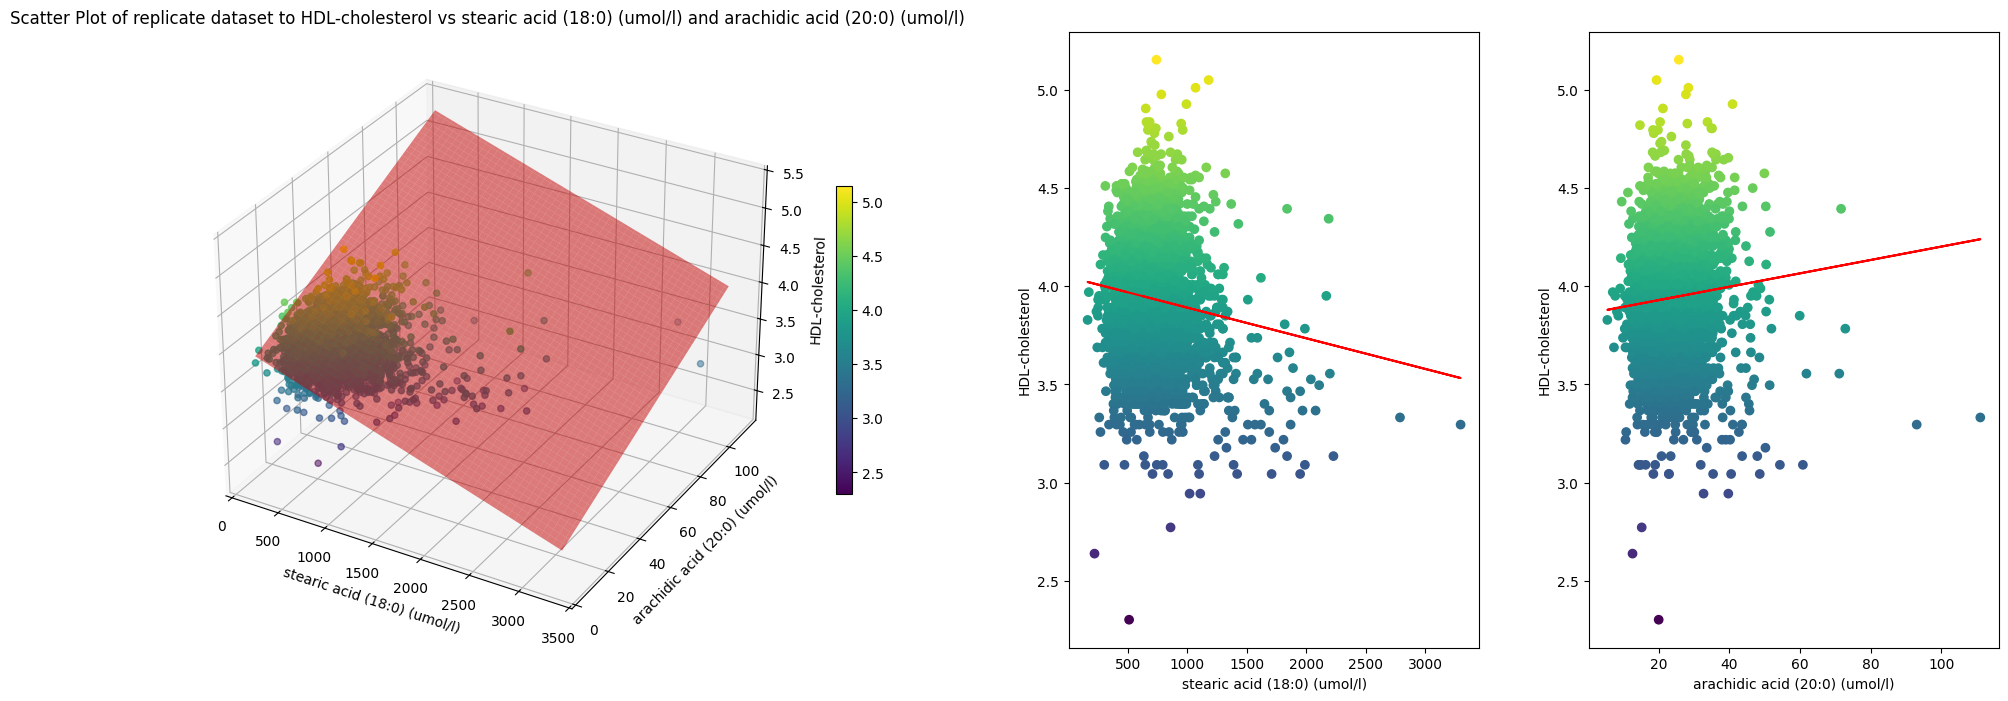

Processing: LBDHDD - LBXDP3 - LBXAR1 || replicate


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


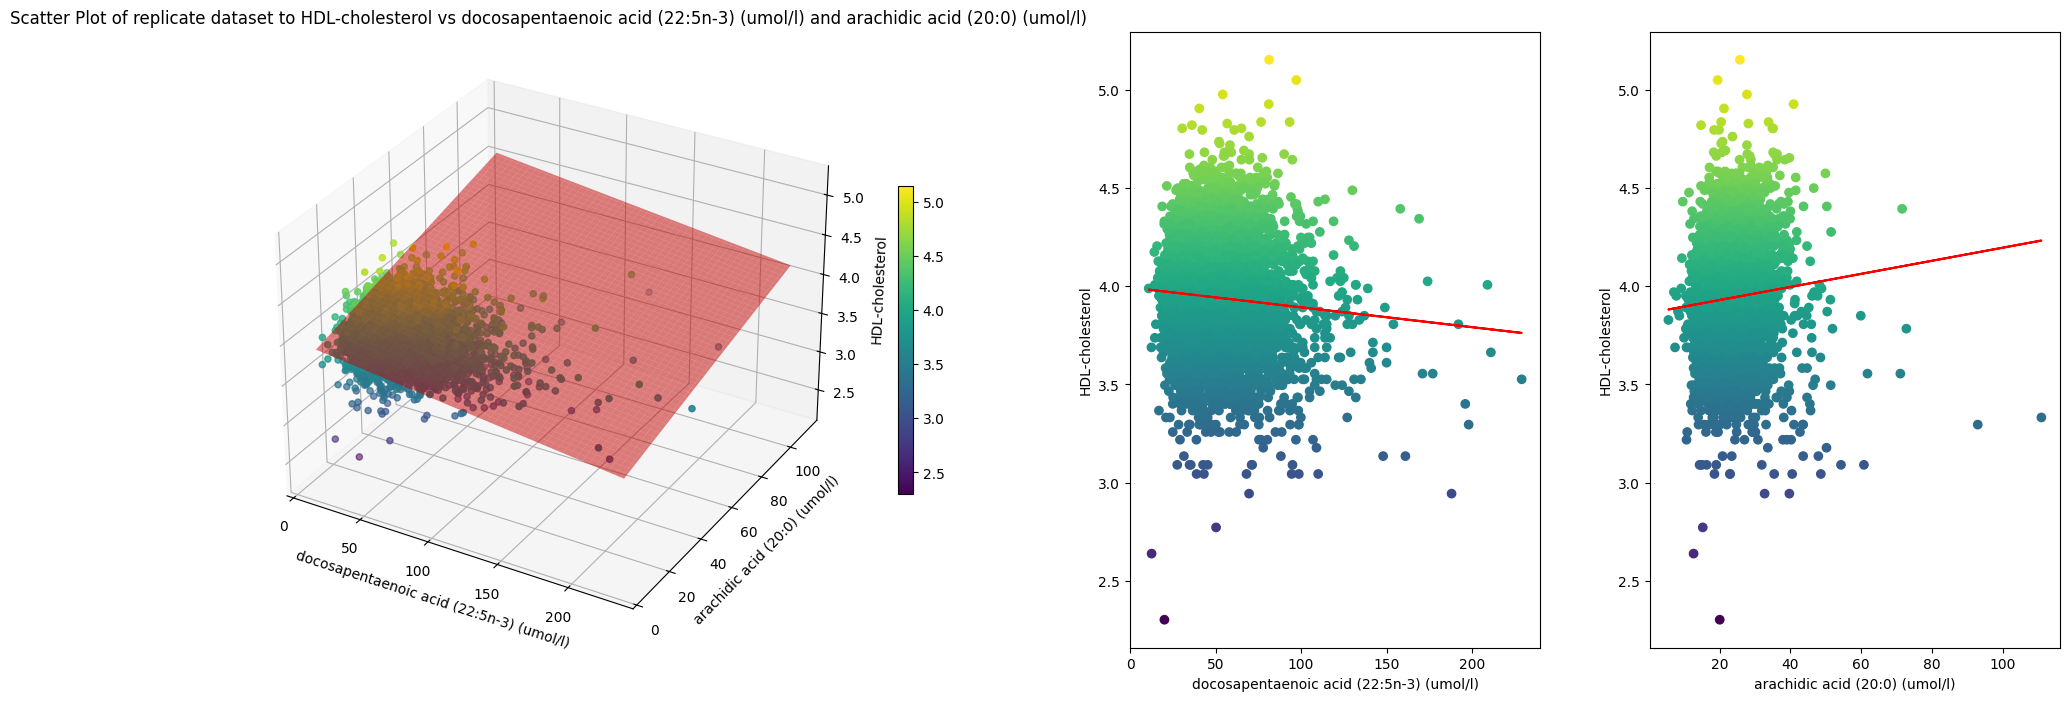

Processing: LBDHDD - LBXDP3 - LBXAR1 || discovery


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


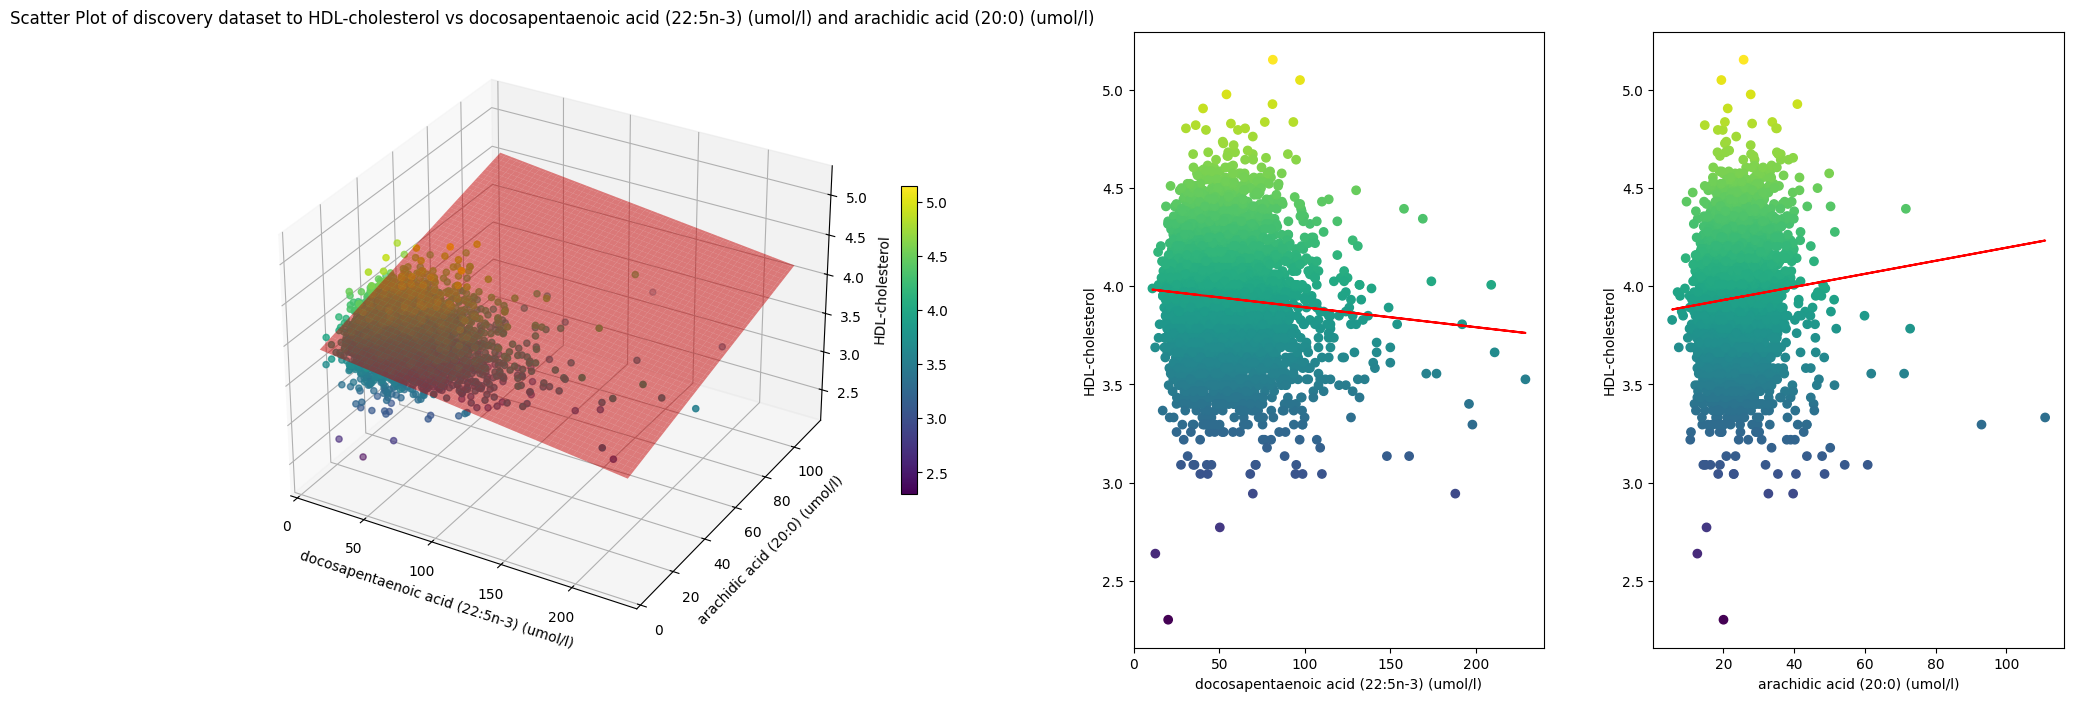

Processing: LBDHDD - LBXST1 - LBXAR1 || discovery


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


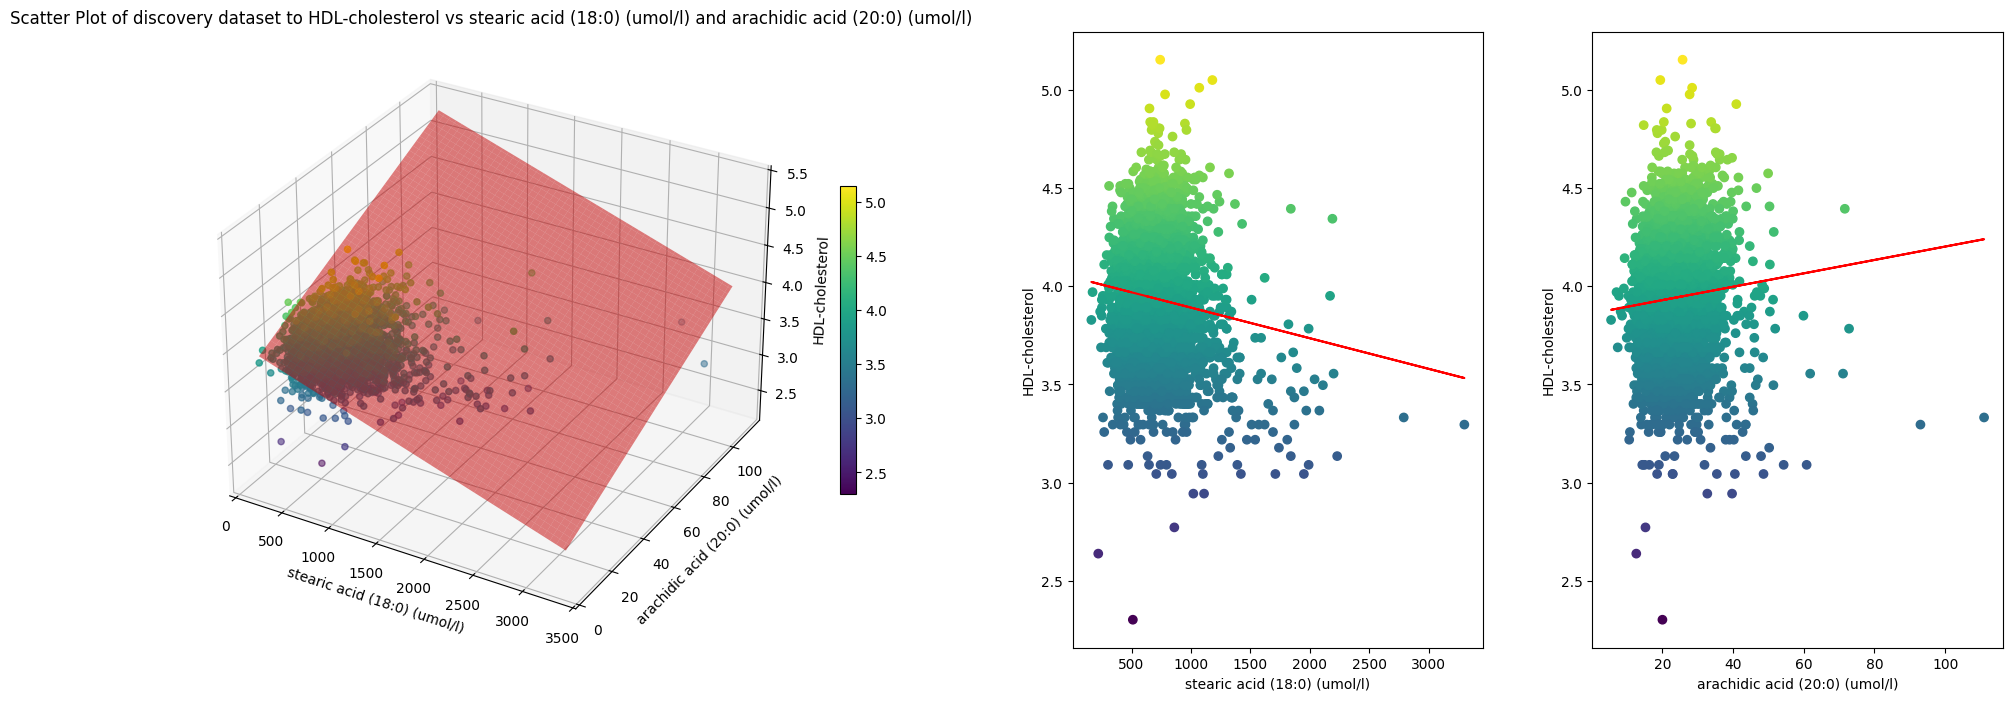

Processing: LBDHDD - LBX2DF - LBXVBZ || discovery


/home/alrico/group/personal/alrico/projects/pbs_igem/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


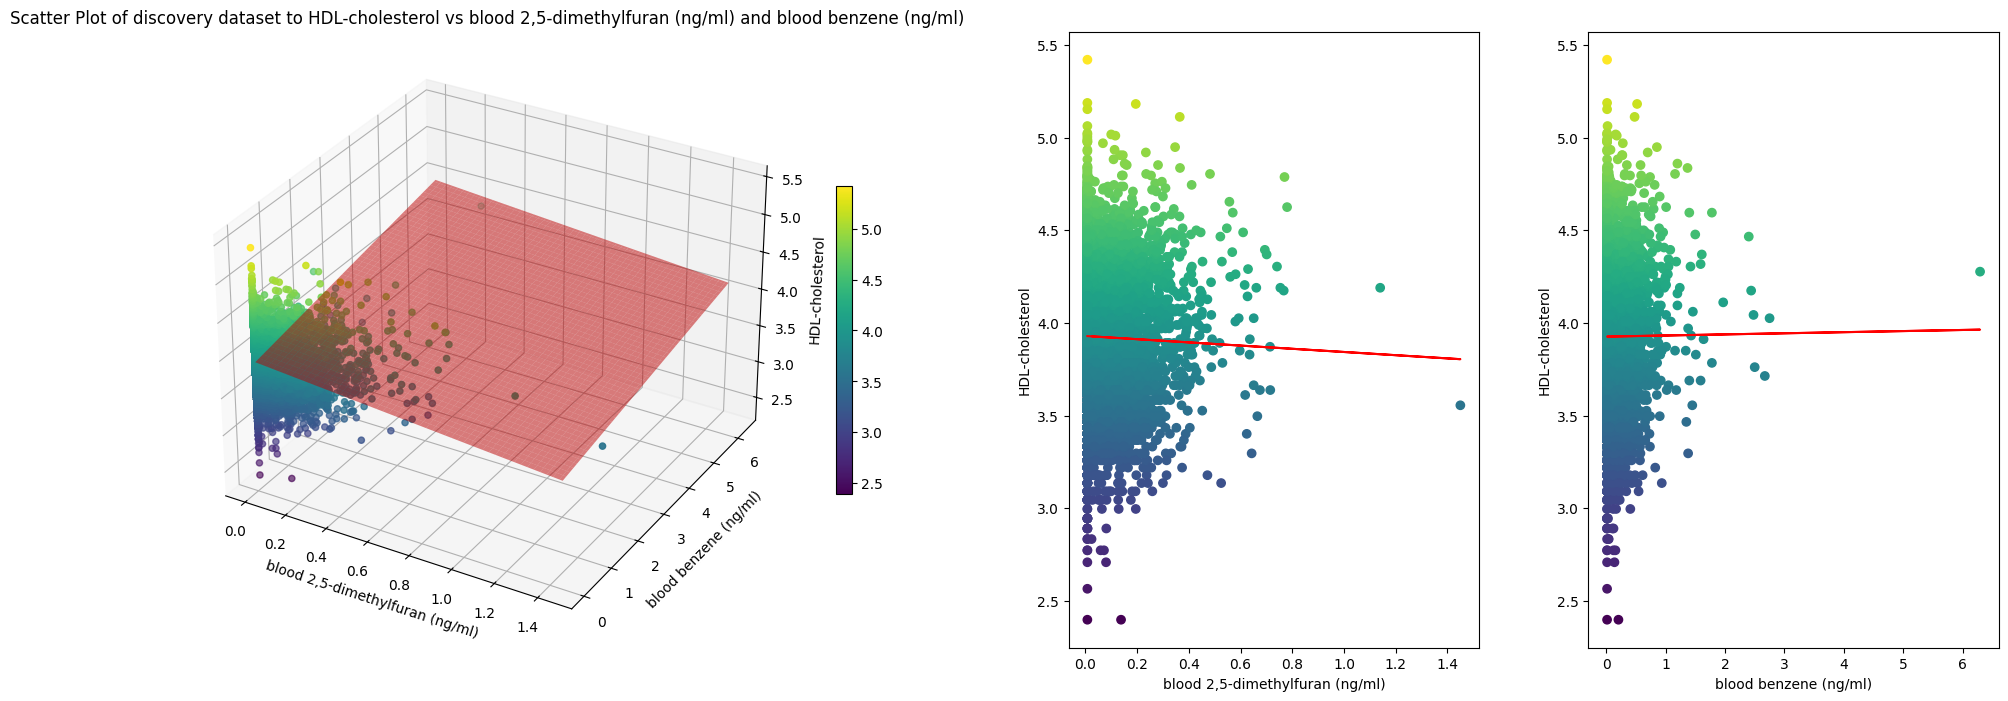

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Loop para cada resultado significativo de Outcome
for i_mappair in df_results_outcome.index:
    # Obter Exposomes
    e1 = df_results_outcome["Term1"][i_mappair]
    e2 = df_results_outcome["Term2"][i_mappair]
    e1_desc = df_results_outcome["Term1_description"][i_mappair]
    e2_desc = df_results_outcome["Term2_description"][i_mappair]
    source = df_results_outcome["data_source"][i_mappair]
    out = 'HDL-cholesterol'

    print(f"Processing: {outcome} - {e1} - {e2} || {source}")

    # Obter os dados
    df_exe = df_nhanes[[e1, e2, outcome] + list_covariates].copy()
    df_exe.dropna(inplace=True)

    # Verificar se e1 e e2 são numéricos
    is_e1_numeric = pd.api.types.is_numeric_dtype(df_exe[e1])
    is_e2_numeric = pd.api.types.is_numeric_dtype(df_exe[e2])

    fig = plt.figure(figsize=(24, 8))
    gs = GridSpec(1, 3, width_ratios=[8, 4, 4])

    # Gráfico à esquerda
    ax1 = fig.add_subplot(gs[0], projection='3d' if is_e1_numeric and is_e2_numeric else None)

    if is_e1_numeric and is_e2_numeric:
        # Preparar os dados para a regressão linear
        X = df_exe[[e1, e2]]
        y = df_exe[outcome]

        # Ajustar o modelo de regressão linear
        reg = LinearRegression()
        reg.fit(X, y)

        # Prever valores de HDL ao longo de um grid de valores de e1 e e2
        x_surf, y_surf = np.meshgrid(np.linspace(X[e1].min(), X[e1].max(), 100), np.linspace(X[e2].min(), X[e2].max(), 100))
        z_surf = reg.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

        # Scatter plot 3D
        sc = ax1.scatter(df_exe[e1], df_exe[e2], df_exe[outcome], c=df_exe[outcome], cmap='viridis', marker='o')

        # Adicionar a superfície de tendência
        ax1.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

        ax1.set_xlabel(e1_desc)
        ax1.set_ylabel(e2_desc)
        ax1.set_zlabel(out)
        ax1.set_title(f'Scatter Plot of {source} dataset to {out} vs {e1_desc} and {e2_desc}')

        # Adicionar barra de cor
        cb = plt.colorbar(sc, ax=ax1, shrink=0.5)
        # cb.set_label(out)

        # # Criar um novo eixo para a barra de cor na esquerda
        # divider = make_axes_locatable(ax1)
        # cax = divider.append_axes("left", size="5%", pad=0.1)
        # cb = plt.colorbar(sc, cax=cax)
        # cb.set_label(out)



    # Adicionar gráficos 2D de regressão
    ax3 = fig.add_subplot(gs[1])
    sc3 = ax3.scatter(df_exe[e1], df_exe[outcome], c=df_exe[outcome], cmap='viridis', label=f'{e1} vs {outcome}')
    X_e1 = df_exe[[e1]]
    reg_e1 = LinearRegression().fit(X_e1, y)
    ax3.plot(X_e1, reg_e1.predict(X_e1), color='red')
    ax3.set_xlabel(e1_desc)
    ax3.set_ylabel(out)
    # ax3.set_title(f'{out} vs {e1}')
    # cb3 = plt.colorbar(sc3, ax=ax3, shrink=0.5)
    # cb3.set_label(outcome)
    
    ax4 = fig.add_subplot(gs[2])
    sc4 = ax4.scatter(df_exe[e2], df_exe[outcome], c=df_exe[outcome], cmap='viridis', label=f'{e2} vs {outcome}')
    X_e2 = df_exe[[e2]]
    reg_e2 = LinearRegression().fit(X_e2, y)
    ax4.plot(X_e2, reg_e2.predict(X_e2), color='red')
    ax4.set_xlabel(e2_desc)
    ax4.set_ylabel(out)
    # ax4.set_title(f'{out} vs {e2}')
    # cb4 = plt.colorbar(sc4, ax=ax4, shrink=0.5)
    # cb4.set_label(outcome)

    plt.show()


# ----------------


In [ ]:
# Loop to process each Outcome
results = []

# list_outcomes = ['LBDLDL_N'] # DEBUG ONLY
# list_outcomes = ['LBXTC_N'] # DEBUG ONLY
for outcome in list_outcomes:

    # Read QC Dataset
    file_name = str(path_data) + "/data/step_05_05/QC_NHANES_" + outcome + ".pkl"
    df_nhanes = pd.read_pickle(file_name)

    df_results_outcome = filtered_df_bonf[filtered_df_bonf['Outcome'] == outcome]

    

    # Loop to each significant Outcome result
    for i_mappair in df_results_outcome.index:
        if str(df_results_outcome['data_source'][i_mappair]) == 'discovery':
            continue

        # get Exposomes
        result_details = ''
        e1 = df_results_outcome["Term1"][i_mappair]
        e2 = df_results_outcome["Term2"][i_mappair]

        print(f"Processing: {outcome} - {e1} - {e2}")

        # Get the data
        df_exe = df_nhanes[[e1, e2, outcome] + list_covariates].copy()
        df_exe.dropna(inplace=True)

        # Verificar se e1 e e2 são numéricos
        is_e1_numeric = pd.api.types.is_numeric_dtype(df_exe[e1])
        is_e2_numeric = pd.api.types.is_numeric_dtype(df_exe[e2])

        fig = plt.figure(figsize=(18, 8))
        gs = GridSpec(1, 2, width_ratios=[8, 2])

        # Gráfico à esquerda
        ax1 = fig.add_subplot(gs[0], projection='3d' if is_e1_numeric and is_e2_numeric else None)

        if is_e1_numeric and is_e2_numeric:

            # Preparar os dados para a regressão linear
            X = df_exe[[e1, e2]]
            y = df_exe[outcome]

            # Ajustar o modelo de regressão linear
            reg = LinearRegression()
            reg.fit(X, y)

            # Prever valores de HDL ao longo de um grid de valores de e1 ee2 
            x_surf, y_surf = np.meshgrid(np.linspace(X[e1].min(), X[e1].max(), 100), np.linspace(X[e2].min(), X[e2].max(), 100))
            z_surf = reg.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

            # Scatter plot 3D
            sc = ax1.scatter(df_exe[e1], df_exe[e2], df_exe[outcome], c=df_exe[outcome], cmap='viridis', marker='o')

            # Adicionar a superfície de tendência
            ax1.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

            ax1.set_xlabel(df_results_outcome["Term1_description"][i_mappair])
            ax1.set_ylabel(df_results_outcome["Term2_description"][i_mappair])
            ax1.set_zlabel(outcome)
            ax1.set_title(f'3D Scatter Plot of {outcome} vs {e1} and {e2}')

            # Adicionar barra de cor
            cb = plt.colorbar(sc, ax=ax1, shrink=0.5)
            cb.set_label(df_results_outcome["Outcome"][i_mappair])

            # Right side (Text)
            # Add interaction term to the dataframe
            df_exe['Interaction'] = df_exe[e1] * df_exe[e2]

            # Modelo de regressão linear múltipla com termo de interação
            formula = f'{outcome} ~ {e1} * {e2} + RIDAGEYR + RIAGENDR + RIDRETH1 + BMXBMI'
            model = ols(formula, data=df_exe).fit()

            # Obter R^2 do resumo do modelo
            r_squared = model.rsquared

            # Calcular R a partir de R^2
            r = np.sqrt(r_squared)

            # Right side (Text)
            result_details = f"Processing: {df_results_outcome['data_source'][i_mappair]} - {outcome} - {e1} x {e2}\n"
            result_details += f"-----------------------------------------------------------------\n"

            result_details += f"Term1 {df_results_outcome['Term1'][i_mappair]}: {df_results_outcome['Term1_description'][i_mappair]}\n"
            result_details += f"Term2 {df_results_outcome['Term2'][i_mappair]}: {df_results_outcome['Term2_description'][i_mappair]}\n\n"

            result_details += f"R (Pearson): {r:.5f}\n"
            result_details += f"LRT P-Value: {df_results_outcome['pvalue'][i_mappair]}\n"
            result_details += f"P-Value Bonferroni: {df_results_outcome['pvalue_bonferroni'][i_mappair]}\n\n"


            # Model Summary
            summary_text = result_details + model.summary().as_text()

            # Add text to the right side
            ax2 = fig.add_subplot(gs[1])
            ax2.axis('off')
            ax2.text(0, 0.5, summary_text, fontsize=10, family='monospace', verticalalignment='center')

        else:
            # # Plot para dados categóricos
            # sns.scatterplot(data=df_exe, x=e1, y=e2, hue=outcome, palette='viridis', ax=ax1)

            # ax1.set_xlabel(e1)
            # ax1.set_ylabel(e2)
            # ax1.set_title(f'Scatter Plot of {outcome} vs {e1} and {e2}')
            # ax1.legend(title=outcome)

            # # Right side (Text)
            # result_details = f"Processing: {outcome} - {e1} x {e2}\n"
            # result_details += f"-----------------------------------------------------------------\n"

            # result_details += f"Term1 {df_results_outcome['Term1'][i_mappair]}: {df_results_outcome['Term1_description'][i_mappair]}\n"
            # result_details += f"Term2 {df_results_outcome['Term2'][i_mappair]}: {df_results_outcome['Term2_description'][i_mappair]}\n\n"

            # result_details += f"R (Pearson) not calculated\n"
            # result_details += f"LRT P-Value: {df_results_outcome['pvalue'][i_mappair]}\n"
            # result_details += f"P-Value Bonferroni: {df_results_outcome['pvalue_bonferroni'][i_mappair]}\n\n"
 
            # summary_text = result_details

            # # Add text to the right side
            # ax2 = fig.add_subplot(gs[1])
            # ax2.axis('off')
            # ax2.text(0, 0.5, summary_text, fontsize=10, family='monospace', verticalalignment='center')
            ...
        
        plt.tight_layout()
        plt.show()

# DEBUG AND OTHER ANALYSIS


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

list_covariates = []
# Calcular o VIF
X_vif = df_exe[[e1, e2] + list_covariates]
X_vif['Interaction'] = X_vif[e1] * X_vif[e2]

vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)


       feature        VIF
0       LBXSBU   3.687701
1       URXUCR   7.759630
2  Interaction  11.635544


/var/folders/06/f05rc_9x21nfs2142bf0fmcr0000gn/T/ipykernel_5754/2201756622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_vif['Interaction'] = X_vif[e1] * X_vif[e2]


In [ ]:
# Plotar resíduos para cada variável independente
import seaborn as sns

# Gráfico de resíduos para e1
plt.figure(figsize=(10, 6))
sns.residplot(x=e1, y=outcome, data=df_exe, lowess=True)
plt.title(f'Residuals Plot: {e1} vs {outcome}')
plt.show()

# Gráfico de resíduos para e2
plt.figure(figsize=(10, 6))
sns.residplot(x=e2, y=outcome, data=df_exe, lowess=True)
plt.title(f'Residuals Plot: {e2} vs {outcome}')
plt.show()


In [25]:
# Modelo de regressão linear múltipla sem termo de interação
formula_no_interaction = f'{outcome} ~ {e1} + {e2} + RIDAGEYR + RIAGENDR + RIDRETH1'
model_no_interaction = ols(formula_no_interaction, data=df_exe).fit()

# Resumo do modelo sem interação
print(model_no_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                LBXTC_N   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     594.1
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:41:01   Log-Likelihood:                 6736.3
No. Observations:               45693   AIC:                        -1.345e+04
Df Residuals:                   45684   BIC:                        -1.338e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1382      0.004   11

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular o VIF sem BMXBMI
X_vif_no_bmxbmi = df_exe[[e1, e2, 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1']]
X_vif_no_bmxbmi['Interaction'] = X_vif_no_bmxbmi[e1] * X_vif_no_bmxbmi[e2]

vif_data_no_bmxbmi = pd.DataFrame()
vif_data_no_bmxbmi['feature'] = X_vif_no_bmxbmi.columns
vif_data_no_bmxbmi['VIF'] = [variance_inflation_factor(X_vif_no_bmxbmi.values, i) for i in range(len(X_vif_no_bmxbmi.columns))]

print(vif_data_no_bmxbmi)


       feature        VIF
0       LBXSBU  15.759153
1       URXUCR  16.319111
2     RIDAGEYR   8.185979
3     RIAGENDR   7.647410
4     RIDRETH1   6.382294
5  Interaction  20.603480


/var/folders/06/f05rc_9x21nfs2142bf0fmcr0000gn/T/ipykernel_5754/2463878642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_vif_no_bmxbmi['Interaction'] = X_vif_no_bmxbmi[e1] * X_vif_no_bmxbmi[e2]


In [27]:
from sklearn.decomposition import PCA

# Selecionar as variáveis com VIF elevado
X_high_vif = df_exe[[e1, e2, 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1']]
X_high_vif['Interaction'] = X_high_vif[e1] * X_high_vif[e2]

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_pca = pca.fit_transform(X_high_vif)

# Adicionar os componentes principais de volta ao dataframe
df_exe['PCA1'] = X_pca[:, 0]
df_exe['PCA2'] = X_pca[:, 1]

# Ajustar o modelo com os componentes principais
formula_pca = f'{outcome} ~ PCA1 + PCA2 + RIDAGEYR + RIAGENDR + RIDRETH1'
model_pca = ols(formula_pca, data=df_exe).fit()

# Resumo do modelo com PCA
print(model_pca.summary())


                            OLS Regression Results                            
Dep. Variable:                LBXTC_N   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     581.6
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:44:26   Log-Likelihood:                 6691.1
No. Observations:               45693   AIC:                        -1.336e+04
Df Residuals:                   45684   BIC:                        -1.329e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1093      0.004   14

/var/folders/06/f05rc_9x21nfs2142bf0fmcr0000gn/T/ipykernel_5754/546707348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_high_vif['Interaction'] = X_high_vif[e1] * X_high_vif[e2]


In [ ]:
from sklearn.linear_model import Ridge

# Preparar os dados
X = df_exe[['e1_centered', 'e2_centered', 'interaction_centered', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1']]
y = df_exe[outcome]

# Ajustar o modelo de Ridge Regression
ridge = Ridge(alpha=1.0)  # O valor de alpha pode ser ajustado conforme necessário
ridge.fit(X, y)

# Coeficientes do modelo de Ridge Regression
print("Coeficientes do modelo de Ridge Regression:", ridge.coef_)
print("Intercepto do modelo de Ridge Regression:", ridge.intercept_)
